#### Evaluation Project - 7

In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [3]:
# loading dataset
df=pd.read_csv('loan_prediction.csv')

In [4]:
#diplaying 1st 5 records
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

#### Dataset has records=614 and columns =13

In [6]:
# retriving column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# finding out column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Catagorical columns (8) :**
    ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
**Continuous columns (5) :**
    [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
       
       

#### We can observe from above information following columns does not conatin null(non-null) values but still don't have all records present ie. 614 
   [ 'Gender' =(601/614), 'Married'  =(611/614), 'Dependents'=(599/614), 
       'Self_Employed'=(582/614), 'LoanAmount'=(601/614),
       'Loan_Amount_Term'=(600/614), 'Credit_History'=(564/614)]
will have to check for it .

In [8]:
# checking for Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### We can see there are null values present in following columns :
'Gender' =13, 'Married'  =3, 'Dependents'=15, 
       'Self_Employed'=32, 'LoanAmount'=22,
       'Loan_Amount_Term'=14, 'Credit_History'=50

#### for imputing null values will separate out categorical and continuous data
**categorical:**['Gender', 'Married', 'Dependents', 'Self_Employed']
**continuous :**['LoanAmount','Loan_Amount_Term', 'Credit_History']

### Data imputation:

#### Categorical features

In [9]:
cat=['Gender', 'Married', 'Dependents', 'Self_Employed']
for i in cat:
    print(f"fill {i} with : {df[i].mode()}")
    


fill Gender with : 0    Male
dtype: object
fill Married with : 0    Yes
dtype: object
fill Dependents with : 0    0
dtype: object
fill Self_Employed with : 0    No
dtype: object


In [10]:
df[i].mode()[0]

'No'

In [11]:
df[i].mode()
cat=['Gender', 'Married', 'Dependents', 'Self_Employed']
for i in cat:
    print(f"fill {i} with :{df[i].mode()[0]}")
    df[i]=df[i].fillna(df[i].mode()[0])
#lets check null values
df.isnull().sum()

fill Gender with :Male
fill Married with :Yes
fill Dependents with :0
fill Self_Employed with :No


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### we can see all categorical null values got filled with 'mode' values

#### Continuous features

In [12]:
cont = ['LoanAmount','Loan_Amount_Term', 'Credit_History']
for i in cont:
    print(f"fill {i} with :  {float(round(df[i].mean()))}") 
    df[i]=df[i].fillna(float(round(df[i].mean())))
#lets check null values
df.isnull().sum()

fill LoanAmount with :  146.0
fill Loan_Amount_Term with :  342.0
fill Credit_History with :  1.0


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### we can see all continuous null values got filled with 'mean' values

### EDA

In [13]:
df.groupby('Loan_Status')['Gender'].value_counts()

Loan_Status  Gender
N            Male      155
             Female     37
Y            Male      347
             Female     75
Name: Gender, dtype: int64

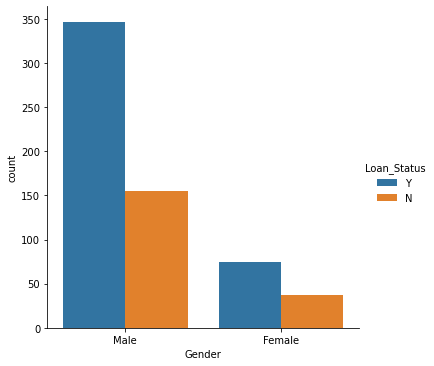

In [14]:
# Gender vs Loan_Status
sns.catplot(x='Gender' ,hue='Loan_Status',data=df ,kind='count')

#### we can see 30% males loan is rejected whereas for Female rejection percentage is 33% which is almost same ,so Gender has not much impact on Loan Status .

In [15]:
print(df['Married'].value_counts())
df.groupby('Loan_Status')['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64


Loan_Status  Married
N            Yes        113
             No          79
Y            Yes        288
             No         134
Name: Married, dtype: int64

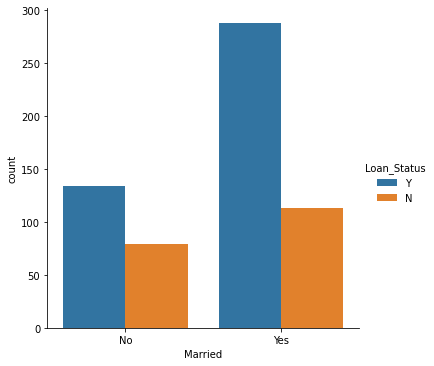

In [16]:
# Gender vs Loan_Status
sns.catplot(x='Married' ,hue='Loan_Status',data=df ,kind='count')

#### Rejection rate for Self_Employed is as follow:
1)No : 31%
2)Yes : 31.7%
not much diffrence in loan status for both Employed and self_employed . Both has equal weightage.

In [17]:
print(df['Dependents'].value_counts())
df.groupby('Loan_Status')['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Loan_Status  Dependents
N            0             113
             1              36
             2              25
             3+             18
Y            0             247
             2              76
             1              66
             3+             33
Name: Dependents, dtype: int64

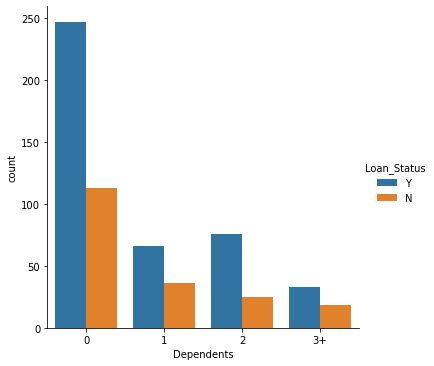

In [18]:
# Gender vs Loan_Status
sns.catplot(x='Dependents' ,hue='Loan_Status',data=df ,kind='count')

#### Rejection rate for Dependents is as follow:
1) 0 : 31%
2) 1 : 35%
3) 2 : 25%
3) 3+: 35% no of Dependents 1 and 3+ has highest rejection frate rate that is for 2 dependenyts ia lowest . 

In [19]:
print(df['Education'].value_counts())
df.groupby('Loan_Status')['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
Name: Education, dtype: int64

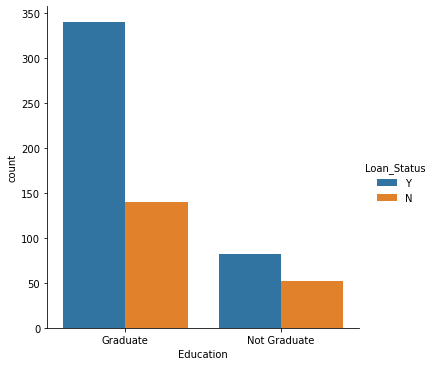

In [20]:
# Gender vs Loan_Status
sns.catplot(x='Education' ,hue='Loan_Status',data=df ,kind='count')

#### Rejection rate for Education is as follow:
1)Graduate : 29%
2)Not Graduate : 39%

Education plays importanant role in loan passing there are less chances of loan approval for non graduate than graduate people.

In [21]:
print(df['Self_Employed'].value_counts())
df.groupby('Loan_Status')['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64


Loan_Status  Self_Employed
N            No               166
             Yes               26
Y            No               366
             Yes               56
Name: Self_Employed, dtype: int64

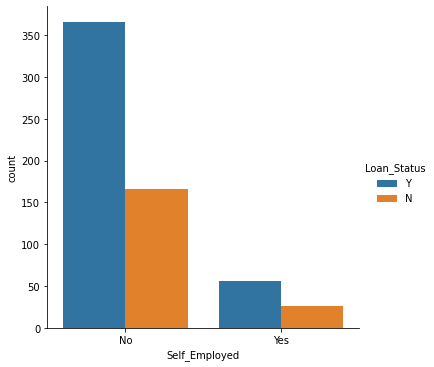

In [22]:
# Self_Employed vs Loan_Status
sns.catplot(x='Self_Employed' ,hue='Loan_Status',data=df ,kind='count')

#### Rejection rate for Self_Employed is as follow:
1)No : 31%
2)Yes : 31.7%
not much diffrence in loan status for both Employed and self_employed . Both has equal weightage.

In [23]:
print(df['Property_Area'].value_counts())
df.groupby('Loan_Status')['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status  Property_Area
N            Rural             69
             Urban             69
             Semiurban         54
Y            Semiurban        179
             Urban            133
             Rural            110
Name: Property_Area, dtype: int64

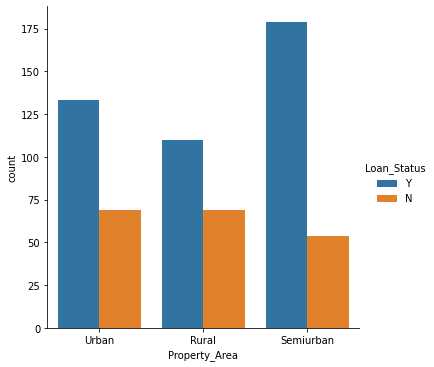

In [24]:
# Property_Area vs Loan_Status
sns.catplot(x='Property_Area' ,hue='Loan_Status',data=df ,kind='count')

#### Rejection rate for Property_Area is as follow:
1)Semiurban : 23%
2)Urban : 34%
3)Rural : 38.5%
 Rejection rate for semiurban Property_Area is lowest and its highest for Rural Property_Area .

<Figure size 2160x720 with 0 Axes>

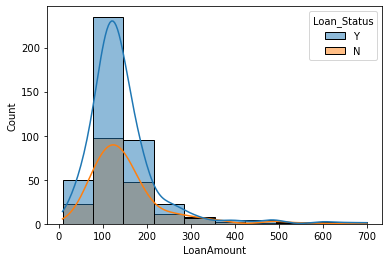

<Figure size 2160x720 with 0 Axes>

In [25]:
# LoanAmount vs Loan_Status
sns.histplot(x='LoanAmount' ,hue='Loan_Status', bins=10,data=df ,kde=True ,)
plt.figure(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

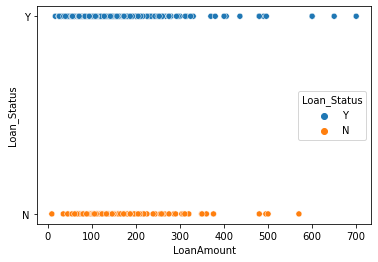

<Figure size 2160x720 with 0 Axes>

In [26]:
# LoanAmount vs Loan_Status
sns.scatterplot(x='LoanAmount' ,y='Loan_Status',hue='Loan_Status',data=df )
plt.figure(figsize=(30,10))

#### we can loan approval heighest between 90-130. from kde curve we can see This data is normally distributed.

<Figure size 2160x720 with 0 Axes>

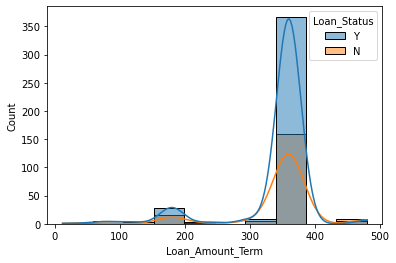

<Figure size 2160x720 with 0 Axes>

In [27]:
# Loan_Amount_Term vs Loan_Status
sns.histplot(x='Loan_Amount_Term' ,hue='Loan_Status', bins=10,data=df ,kde=True ,)
plt.figure(figsize=(30,10))

#### we can see most bof the people are interested in Loan_Amount_Term in rage of 330-385 and rejection rate is around 40%

In [28]:
df.groupby('Loan_Amount_Term')['LoanAmount'].value_counts()

Loan_Amount_Term  LoanAmount
12.0              111.0         1
36.0              80.0          1
                  155.0         1
60.0              125.0         1
                  155.0         1
                               ..
480.0             143.0         1
                  151.0         1
                  158.0         1
                  187.0         1
                  650.0         1
Name: LoanAmount, Length: 278, dtype: int64

<Figure size 2160x720 with 0 Axes>

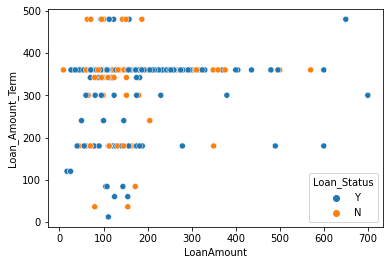

<Figure size 2160x720 with 0 Axes>

In [29]:
sns.scatterplot(y='Loan_Amount_Term' ,x='LoanAmount',hue='Loan_Status',data=df )
plt.figure(figsize=(30,10))

#### 1)70% of the loan amount is between(50-200) and amount_term is between (190-360) .
#### 2)Very few people opted for loan amount >400

<Figure size 2160x720 with 0 Axes>

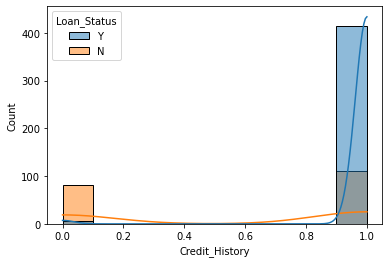

<Figure size 2160x720 with 0 Axes>

In [30]:
# Credit_History vs Loan_Status
sns.histplot(x='Credit_History' ,hue='Loan_Status', bins=10,data=df ,kde=True ,)
plt.figure(figsize=(30,10))

In [31]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

**1)Number of people with Credit_History '0' applied for  loan is around 89 and approval got is for around 9, rejection ration is around 89% .
1)Number of people with Credit_History '1' applied for  loan is around 525 and approval got is for around 320, rejection ration is around 26% .**

### Converting the Categorical variables to numbers


In [32]:
df['Gender']=df['Gender'].astype('category').cat.codes
df['Married']=df['Married'].astype('category').cat.codes
df['Self_Employed']=df['Self_Employed'].astype('category').cat.codes
df['Education']=df['Education'].astype('category').cat.codes
df['Property_Area']=df['Property_Area'].astype('category').cat.codes
df['Loan_Status']=df['Loan_Status'].astype('category').cat.codes
df['Dependents']=df['Dependents'].astype('category').cat.codes
         

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
df.drop('Loan_ID' ,axis=1,inplace=True)


#### Droping Loan_ID from table since its not a deciding feature

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Finding Correlation :

In [36]:
round(df.corr(),2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,0.17,0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,-0.03,0.02
Married,0.36,1.00,0.33,0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09
Dependents,0.17,0.33,1.00,0.06,0.06,0.12,0.03,0.16,-0.10,-0.04,-0.00,0.01
Education,0.05,0.01,0.06,1.00,-0.01,-0.14,-0.06,-0.17,-0.08,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,0.06,-0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00
ApplicantIncome,0.06,0.05,0.12,-0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,0.11,0.15,0.16,-0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,-0.04
Loan_Amount_Term,-0.07,-0.10,-0.10,-0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02
Credit_History,0.01,0.01,-0.04,-0.07,-0.00,-0.02,0.01,-0.00,0.00,1.00,0.00,0.54


<AxesSubplot:>

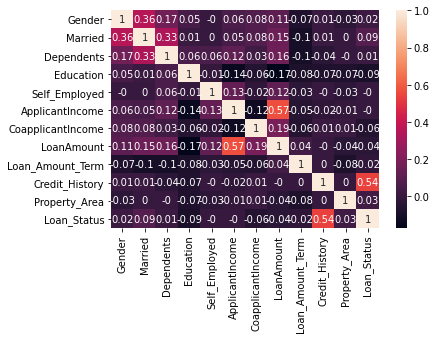

In [37]:
#correlation matrix
sns.heatmap(round(df.corr(),2),annot=True)

#### there is no strong correlation between any feature .  Loan amount and applicant's income are +vely correlated 

In [38]:
# finding correlation with target
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036345
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

**1)+vely correlated features :** Credit_History,Married ,Property_Area ,Gender 
**2)-vely correlated features :** Self_Employed ,ApplicantIncome ,Loan_Amount_Term ,CoapplicantIncome ,Education
**3)Credit_History is highly +vely correlated with Loan_status**

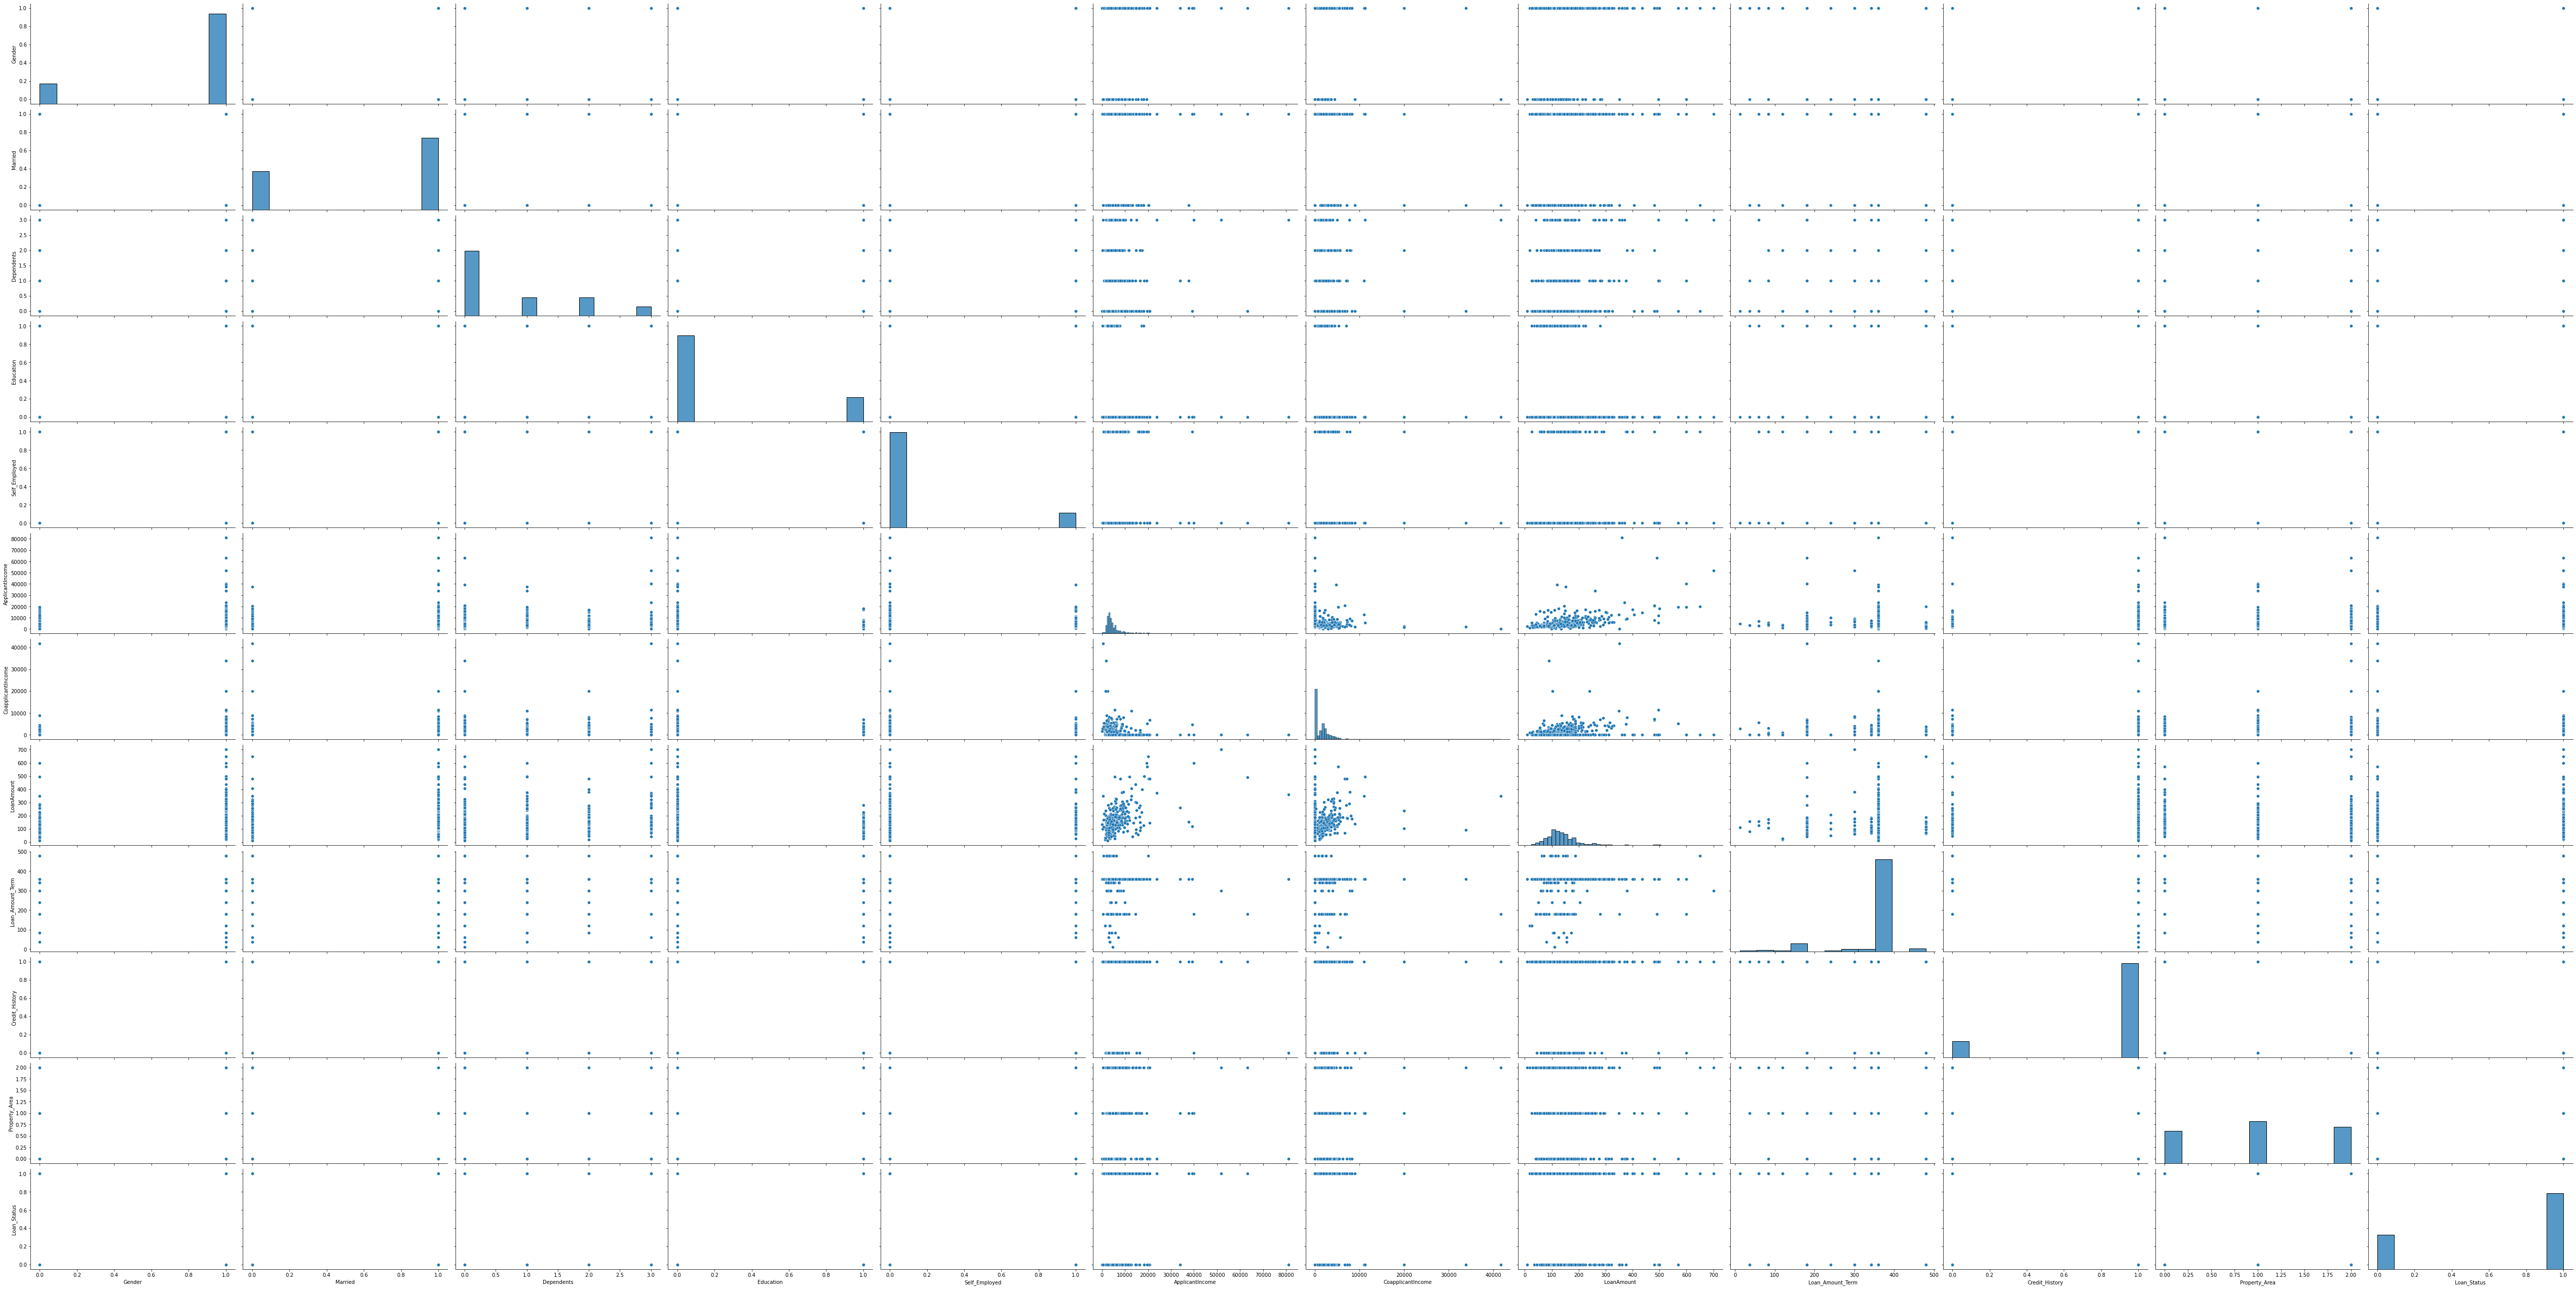

In [39]:
#checking skewness
sns.pairplot(df,height= 3 ,aspect=2)

### Checking Skewness in data

In [40]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### since we wre not going to use Logistic regression model will keep skewness as it is.oter models doesn't have linear distributed dat requirement.

### Checking outliers

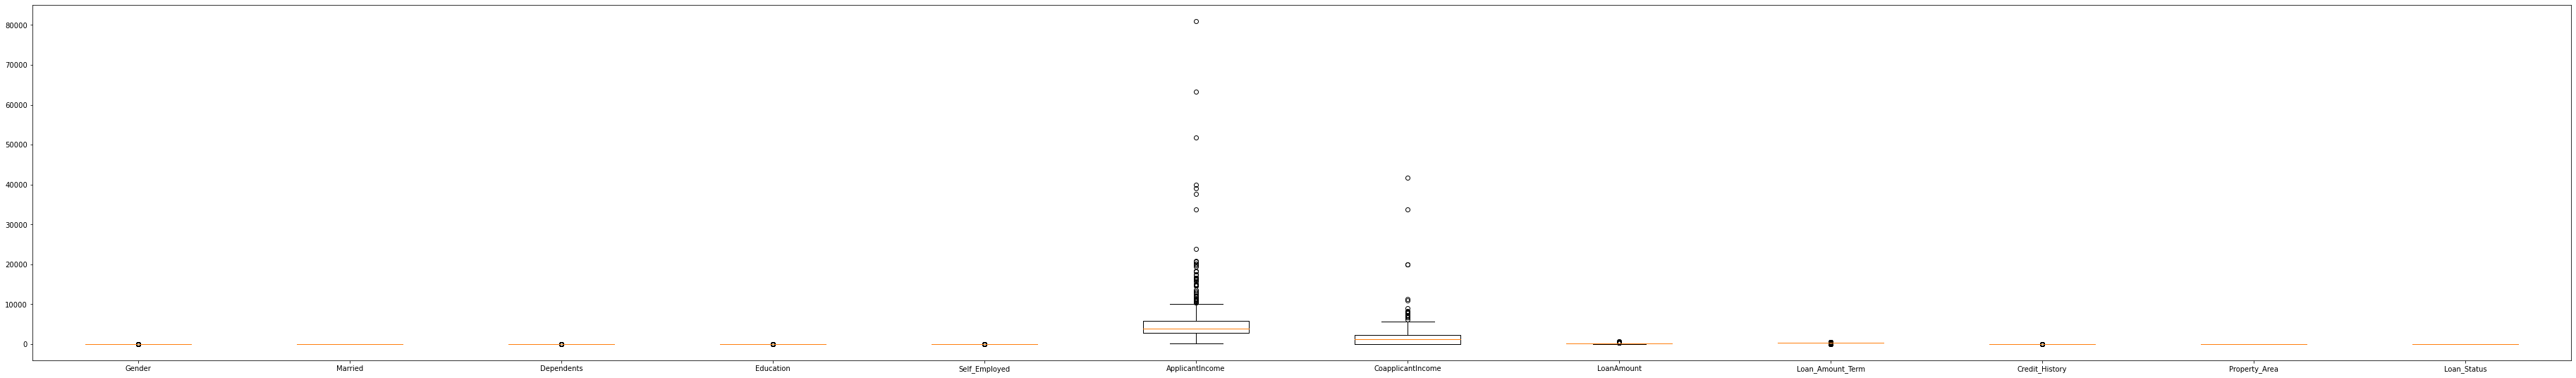

In [41]:
fig = plt.figure(figsize =(50,7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot

bp = ax.boxplot(df ,data=df,labels=df.columns)

# show plot
plt.show()

#### There are many outliers in ApplicantIncome and CoapplicantIncome .

In [42]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

[[0.47234264 1.37208932 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.41173269 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.42876026 0.04760721 1.48253724]]


In [43]:
threshold =3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [44]:
len((np.where(z>3)[0]))

41

In [45]:
# will drop outliers
df=df.drop([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])

In [46]:
df.shape

(577, 12)

In [47]:
#% data loss
loss=41/618 *100
print("% data loss is :",loss)

% data loss is : 6.634304207119741


In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [49]:
df['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

#### 70:30 data distribution which is imbalance so will try to make it balance using SMOT method

### Spliting data for training the model

In [50]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [51]:
print(x.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       146.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4              2  


In [52]:
print(y.head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int8


### Model 1 RandomForestClassifier :

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
RFC = RandomForestClassifier()


#### will try to find out best value Random State

In [54]:
max_accu = 0
max_randst = 0
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    RFC.fit(x_train,y_train)
    
    pred_RFC=RFC.predict(x_test)
    accu_score= accuracy_score(y_test,pred_RFC)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i


In [55]:
print("max accuracy score is :", round(max_accu*100 ,1),"at random state :",max_randst)

max accuracy score is : 90.5 at random state : 494


In [56]:
Model_report = pd.DataFrame(columns=['Model_name','Balance','Accuracy_Score','Confusion_matrix'])

In [57]:
def model_report_append(name,bal,accu,confu_mat):
    Model_report=Model_report.append({
                                   'Model_name':name,'Balance':bal,
                                   'Accuracy_Score':accu,
                                   'Confusion_matrix':confu_mat},ignore_index=True)

### Let's Scale the Data using StandardScaler

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=494)

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
sc = StandardScaler().fit(x_train)

# transform training data
x_train_sc = sc.transform(x_train)

# transform testing dataabs
x_test_sc = sc.transform(x_test)

RFC.fit(x_train_sc,y_train)

pred_RFC=RFC.predict(x_test_sc)

accu_score= accuracy_score(y_test,pred_RFC)
Model_report=Model_report.append({
                                   'Model_name':'RandomForestClassifier','Balance':'Imbalanced',
                                   'Accuracy_Score':round(accu_score*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,pred_RFC)},ignore_index=True)


In [59]:
print(Model_report)

               Model_name     Balance  Accuracy_Score    Confusion_matrix
0  RandomForestClassifier  Imbalanced            89.7  [[16, 8], [4, 88]]


In [60]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,RandomForestClassifier,Imbalanced,89.7,"[[16, 8], [4, 88]]"


### Will balance dataset using SMOTE 

In [61]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [62]:
os = SMOTETomek()

x_train_sm,y_train_sm = os.fit_sample(x_train_sc,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({1: 306, 0: 155})
The number of classes after fit Counter({1: 281, 0: 281})


#### we  can see after applying SMOT both the classes has equal number of records .

#### Lets check accuracy parameters after balancing

In [63]:
RFC=RandomForestClassifier()

In [86]:

RFC.fit(x_train_sm,y_train_sm)

pred_RFC_sm = RFC.predict(x_test_sc)
accu_score_sm = accuracy_score(y_test,pred_RFC_sm)
Model_report=Model_report.append({
                                  'Model_name':'RandomForestClassifier','Balance':'After SMOT Balanced',
                                'Accuracy_Score':round(accu_score_sm*100 ,1),
                                 'Confusion_matrix':confusion_matrix(y_test,pred_RFC_sm)},ignore_index=True)


In [87]:
print(accu_score_sm)
print(confusion_matrix(y_test,pred_RFC_sm))
print(classification_report(y_test,pred_RFC_sm))

0.896551724137931
[[17  7]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.93      0.95      0.94        92

    accuracy                           0.90       116
   macro avg       0.85      0.83      0.84       116
weighted avg       0.89      0.90      0.89       116



In [66]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,RandomForestClassifier,Imbalanced,89.7,"[[16, 8], [4, 88]]"
1,RandomForestClassifier,After SMOT Balanced,87.1,"[[16, 8], [7, 85]]"


### SVC Model-2

In [88]:
from sklearn.svm import SVC
#class_weight=dict({0:1,1:500})
sv = SVC()
sv.fit(x_train_sm,y_train_sm)

SVC()

In [89]:
y_pred=sv.predict(x_test_sc)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':' SVC','Balance':'After SMOT Balanced',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[15  9]
 [ 8 84]]
0.853448275862069
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.90      0.91      0.91        92

    accuracy                           0.85       116
   macro avg       0.78      0.77      0.77       116
weighted avg       0.85      0.85      0.85       116



In [69]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,RandomForestClassifier,Imbalanced,89.7,"[[16, 8], [4, 88]]"
1,RandomForestClassifier,After SMOT Balanced,87.1,"[[16, 8], [7, 85]]"
2,SVC,After SMOT Balanced,85.3,"[[15, 9], [8, 84]]"


### ### Decision Tree Model-3

In [91]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train_sm,y_train_sm)
y_pred=dc.predict(x_test_sc)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':'DecisionTreeClassifier','Balance':'After SMOT Balanced',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[19  5]
 [22 70]]
0.7672413793103449
              precision    recall  f1-score   support

           0       0.46      0.79      0.58        24
           1       0.93      0.76      0.84        92

    accuracy                           0.77       116
   macro avg       0.70      0.78      0.71       116
weighted avg       0.84      0.77      0.79       116



In [71]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,RandomForestClassifier,Imbalanced,89.7,"[[16, 8], [4, 88]]"
1,RandomForestClassifier,After SMOT Balanced,87.1,"[[16, 8], [7, 85]]"
2,SVC,After SMOT Balanced,85.3,"[[15, 9], [8, 84]]"
3,DecisionTreeClassifier,After SMOT Balanced,75.9,"[[18, 6], [22, 70]]"


### Model 4 AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(x_train_sm , y_train_sm)

y_pred = ad.predict(x_test_sc)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':'AdaBoostClassifier','Balance':'After SMOT Balanced',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[18  6]
 [20 72]]
0.7758620689655172
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        24
           1       0.92      0.78      0.85        92

    accuracy                           0.78       116
   macro avg       0.70      0.77      0.71       116
weighted avg       0.83      0.78      0.79       116



In [73]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,RandomForestClassifier,Imbalanced,89.7,"[[16, 8], [4, 88]]"
1,RandomForestClassifier,After SMOT Balanced,87.1,"[[16, 8], [7, 85]]"
2,SVC,After SMOT Balanced,85.3,"[[15, 9], [8, 84]]"
3,DecisionTreeClassifier,After SMOT Balanced,75.9,"[[18, 6], [22, 70]]"
4,AdaBoostClassifier,After SMOT Balanced,77.6,"[[18, 6], [20, 72]]"


#### After seeing Above model report by compairing accuracy score and Confusion matrix will use SVC After SMOT Balanced which is performing well.

### hyper parameter tunning of SVC 

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
sv.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [76]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train_sm , y_train_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [78]:
### prediction with best parameter
grid_pred=grid.best_estimator_.predict(x_test_sc) 
# best score 
accuracy_score(y_test,grid_pred)
print(confusion_matrix(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[10 14]
 [10 82]]
0.7931034482758621
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        24
           1       0.85      0.89      0.87        92

    accuracy                           0.79       116
   macro avg       0.68      0.65      0.66       116
weighted avg       0.78      0.79      0.79       116



In [93]:
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Hyper parameter tunning for RandomForestClassifier() using RandomizedSearchCV

In [ ]:
RandomForestClassifier()

In [96]:
from sklearn.model_selection import RandomizedSearchCV

criterion=["gini", "entropy"]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'criterion': ['gini', 'entropy'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [97]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_sm,y_train_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [98]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'criterion': 'gini',
 'bootstrap': False}

In [99]:
### prediction with best parameter
rf_pred=rf_random.best_estimator_.predict(x_test_sc) 
# best score 
accuracy_score(y_test,rf_pred)
print(confusion_matrix(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[16  8]
 [ 7 85]]
0.8706896551724138
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        24
           1       0.91      0.92      0.92        92

    accuracy                           0.87       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.87      0.87      0.87       116



#### after hyperparameter tunning for both svc and randomforest we are getting SVC accuracy =79.3%   and RandomForestClassifier accuracy=87.1% will go for RandomForestClassifier , which is quite higher.

### ROC AUC plot

Text(0.5, 1.0, 'ROC AUC PLOT')

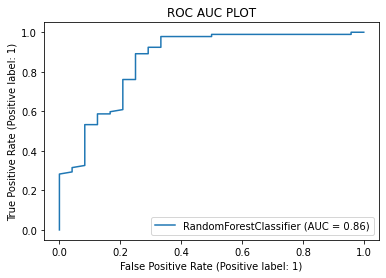

In [101]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_random.best_estimator_,x_test_sc , y_test)
plt.title("ROC AUC PLOT")

### AUC is 0.86 and Accuracy is 0.871 which is good .

In [102]:
import joblib
joblib.dump(grid.best_estimator_,"Loan_Application_Status_Prediction.pkl")

['Loan_Application_Status_Prediction.pkl']